<a href="https://colab.research.google.com/github/OscarTMa/04-Computer_Vision/blob/main/DLintel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook should be useful for teaching computer vision concepts using a Kaggle dataset, demonstrating how to download data, prepare datasets, build and train a convolutional neural network model, and evaluate and visualize the model's performance.

## About Dataset

**Context**
This is image data of Natural Scenes around the world.

**Content**
This Data contains around 25k images of size 150x150 distributed under 6 categories.
* 'buildings' -> 0,
* 'forest' -> 1,
* 'glacier' -> 2,
* 'mountain' -> 3,
* 'sea' -> 4,
* 'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files.

There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

##Explanation:

* **Importing Libraries**: We import TensorFlow, Keras, and Matplotlib. We also import additional modules for file handling and datasets.
* **Installing Kaggle API**: We install the Kaggle API to download datasets directly from Kaggle.

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd


In [3]:
# Install Kaggle API if not already installed
!pip install -q kaggle

## Explanation:

* **Downloading the Dataset:** We use the Kaggle API to download the "Intel Image Classification" dataset.
* **Unzipping the Dataset**: We unzip the downloaded file and extract its contents into the data folder.
python


In [4]:
# Download the dataset from Kaggle
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 343M/346M [00:03<00:00, 86.2MB/s]
100% 346M/346M [00:03<00:00, 110MB/s] 


In [5]:
# Unzip the dataset
with zipfile.ZipFile('intel-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

##Explanation:

* **Defining Directories:** We specify the paths to the training and validation directories where the images are stored.

In [6]:
# Define directories
train_dir = os.path.join('data/seg_train/seg_train')
validation_dir = os.path.join('data/seg_test/seg_test')

In [7]:
# Function to count images in each category
def count_images(directory):
    class_names = os.listdir(directory)
    class_counts = {class_name: len(os.listdir(os.path.join(directory, class_name))) for class_name in class_names}
    return class_counts

In [8]:
# Contar imágenes en los directorios de entrenamiento y validación
train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)

In [9]:
# Mostrar los conteos
print("Conteo de imágenes en el dataset de entrenamiento:", train_counts)
print("Conteo de imágenes en el dataset de validación:", validation_counts)


Conteo de imágenes en el dataset de entrenamiento: {'mountain': 2512, 'buildings': 2191, 'glacier': 2404, 'street': 2382, 'sea': 2274, 'forest': 2271}
Conteo de imágenes en el dataset de validación: {'mountain': 525, 'buildings': 437, 'glacier': 553, 'street': 501, 'sea': 510, 'forest': 474}


In [10]:
# Convertir los conteos a DataFrames para facilitar la visualización
train_counts_df = pd.DataFrame(list(train_counts.items()), columns=['Category', 'Count'])
validation_counts_df = pd.DataFrame(list(validation_counts.items()), columns=['Category', 'Count'])


In [11]:
# Crear las gráficas de barras
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [12]:
print("\nTraining dataset distribution:\n", train_counts_df)
print("\nValidation dataset distribution:\n", validation_counts_df)


Training dataset distribution:
     Category  Count
0   mountain   2512
1  buildings   2191
2    glacier   2404
3     street   2382
4        sea   2274
5     forest   2271

Validation dataset distribution:
     Category  Count
0   mountain    525
1  buildings    437
2    glacier    553
3     street    501
4        sea    510
5     forest    474


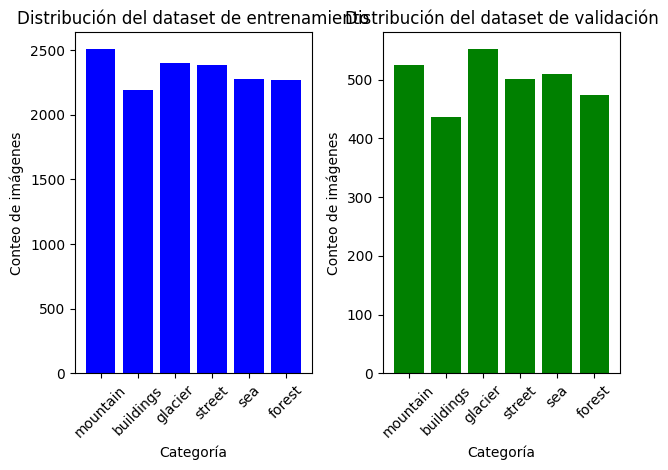

In [13]:
# Gráfica de barras para el dataset de entrenamiento
plt.subplot(1, 2, 1)
plt.bar(train_counts_df['Category'], train_counts_df['Count'], color='blue')
plt.title('Distribución del dataset de entrenamiento')
plt.xlabel('Categoría')
plt.ylabel('Conteo de imágenes')
plt.xticks(rotation=45)

# Gráfica de barras para el dataset de validación
plt.subplot(1, 2, 2)
plt.bar(validation_counts_df['Category'], validation_counts_df['Count'], color='green')
plt.title('Distribución del dataset de validación')
plt.xlabel('Categoría')
plt.ylabel('Conteo de imágenes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

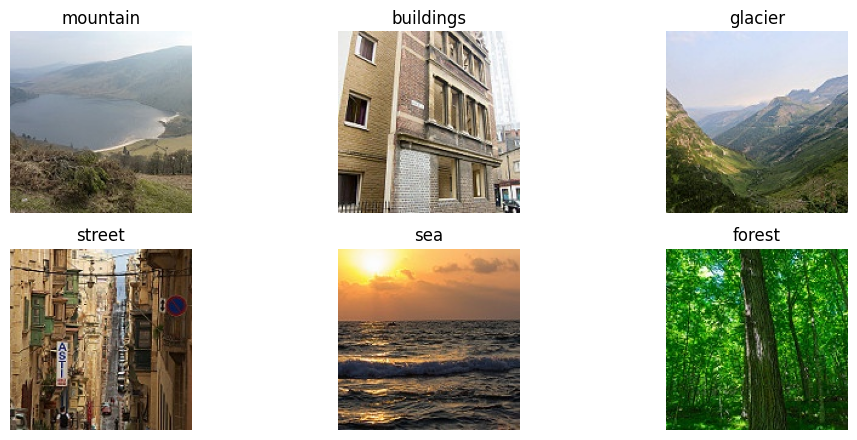

In [14]:
# Function to display sample images from each category
def display_sample_images(directory):
    class_names = os.listdir(directory)
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(class_names):
        image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[0])
        img = load_img(image_path, target_size=(150, 150))
        img_array = img_to_array(img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img_array / 255.0)
        plt.title(class_name)
        plt.axis("off")
    plt.show()

# Display sample images from the training dataset
display_sample_images(train_dir)

In [15]:
# Class labels and their mappings
class_labels = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
}

print("Class labels and their mappings:", class_labels)


Class labels and their mappings: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


##Explanation:

* **Loading Datasets**: We use ` image_dataset_from_directory`  to load images from the training and validation directories. This converts the images into a TensorFlow dataset with a specified image size of 150x150 pixels and a batch size of 32.

In [16]:
# Load datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


##Explanation:

* **Building the Model**: We create a sequential model using Keras.

#  **Explanation**:
* **Rescaling Layer**: This layer normalizes the pixel values of the input images to the range [0, 1], making the training process more stable and faster. The input shape is defined as (150, 150, 3), representing the height, width, and number of color channels of the images.
* **First Convolutional Layer**: This layer has 32 filters with a kernel size of 3x3. It scans the image for simple patterns or features. The ReLU activation function introduces non-linearity, allowing the model to learn more complex functions.
* **First Max Pooling Layer**: This layer performs down-sampling by taking the maximum value from each 2x2 block of pixels, reducing the spatial dimensions of the feature maps and retaining the most important information.
* **Second Convolutional Layer**: This layer has 64 filters with a kernel size of 3x3. It detects more complex patterns in the feature maps produced by the first convolutional layer. The ReLU activation function is used again.
* **Second Max Pooling Layer**: This layer further reduces the spatial dimensions of the feature maps.
* **Third Convolutional Layer**: This layer has 128 filters with a kernel size of 3x3, detecting even more complex patterns. The ReLU activation function is used.
* **Third Max Pooling Layer**: This layer further reduces the spatial dimensions of the feature maps.
* **Fourth Convolutional Layer**: This layer has 128 filters with a kernel size of 3x3, detecting even more complex patterns. The ReLU activation function is used.
* **Fourth Max Pooling Layer**: This layer further reduces the spatial dimensions of the feature maps.
* **Flatten Layer**: This layer transforms the 2D feature maps into a 1D vector, making it suitable for the dense (fully connected) layers.
* **Dense Layer**: This layer has 512 neurons. Each neuron is connected to all neurons in the previous layer. The ReLU activation function introduces non-linearity.
* **Output Layer**: This layer has 6 neurons, one for each category in the dataset. The softmax activation function is used to produce a probability distribution over the 6 categories, making it suitable for multi-class classification.

In [17]:
# Build the model
model = models.Sequential([
    # Rescaling layer: scales pixel values to the range [0, 1] for normalization,
    # input shape is specified as (150, 150, 3) which corresponds to the height, width, and number of color channels (RGB)
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    # First convolutional layer: 32 filters of 3x3, detects simple patterns in the image,
    # ReLU activation to introduce non-linearity
    layers.Conv2D(32, (3, 3), activation='relu'),

    # First max pooling layer: reduces the dimensions of the image by taking the maximum
    # value from each 2x2 pixel block
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer: 64 filters of 3x3, detects more complex patterns,
    # ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Second max pooling layer: further reduces the dimensions of the image
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer: 128 filters of 3x3, detects even more complex patterns,
    # ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Third max pooling layer: further reduces the dimensions of the image
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional layer: 128 filters of 3x3, detects even more complex patterns,
    # ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Fourth max pooling layer: further reduces the dimensions of the image
    layers.MaxPooling2D((2, 2)),

    # Flatten layer: transforms the 2D feature maps into a 1D vector for the dense layer
    layers.Flatten(),

    # Dense (fully connected) layer: 512 neurons, each neuron is connected to all neurons
    # in the previous layer, ReLU activation
    layers.Dense(512, activation='relu'),

    # Output layer: 6 neurons (one for each category), softmax activation to produce
    # a probability distribution over the 6 categories
    layers.Dense(6, activation='softmax')
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

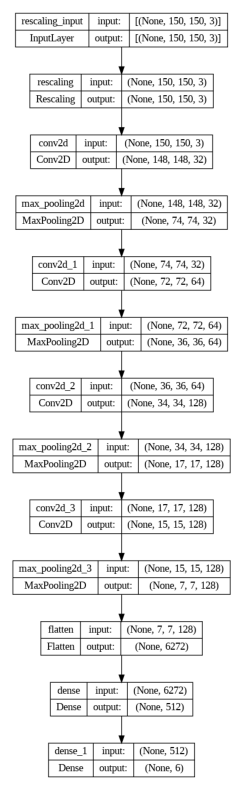

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

def plot_model_layers(model):
    # Usa plot_model de Keras para generar una visualización del modelo
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    # Cargar la imagen y mostrarla en el notebook
    image = plt.imread('model_plot.png')
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Llama a la función con tu modelo
plot_model_layers(model)


##Explanation:

* **Compiling the Model**: We configure the model with the Adam optimizer and the `sparse_categorical_crossentropy` loss function, which is suitable for multi-class classification. We use `accuracy` as the evaluation metric.

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


##Explanation:

* **Training the Model**: We train the model with the training dataset and validate its performance with the validation dataset over 10 epochs.

In [21]:

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
439/439 [==============================] - 757s 2s/step - loss: 0.9924 - accuracy: 0.6015 - val_loss: 0.7675 - val_accuracy: 0.7167
Epoch 2/10
439/439 [==============================] - 737s 2s/step - loss: 0.6736 - accuracy: 0.7468 - val_loss: 0.6038 - val_accuracy: 0.7720
Epoch 3/10
439/439 [==============================] - 783s 2s/step - loss: 0.5422 - accuracy: 0.8017 - val_loss: 0.5715 - val_accuracy: 0.7850
Epoch 4/10
439/439 [==============================] - 727s 2s/step - loss: 0.4462 - accuracy: 0.8384 - val_loss: 0.5074 - val_accuracy: 0.8243
Epoch 5/10
439/439 [==============================] - 727s 2s/step - loss: 0.3611 - accuracy: 0.8702 - val_loss: 0.5618 - val_accuracy: 0.8090
Epoch 6/10
439/439 [==============================] - 719s 2s/step - loss: 0.3032 - accuracy: 0.8903 - val_loss: 0.5599 - val_accuracy: 0.8173
Epoch 7/10
439/439 [==============================] - 717s 2s/step - loss: 0.2350 - accuracy: 0.9139 - val_loss: 0.6820 - val_accuracy: 0.7980

##Explanation:

* **Evaluating the Model**: We evaluate the model using the validation dataset and print the test accuracy.

##Explanation:

* **Plotting Results**:
 * We create a figure with two subplots.
 * In the first subplot, we plot training and validation accuracy over the epochs.
 * In the second subplot, we plot training and validation loss over the epochs.
 * We add labels and legends for better visual interpretation of the results.

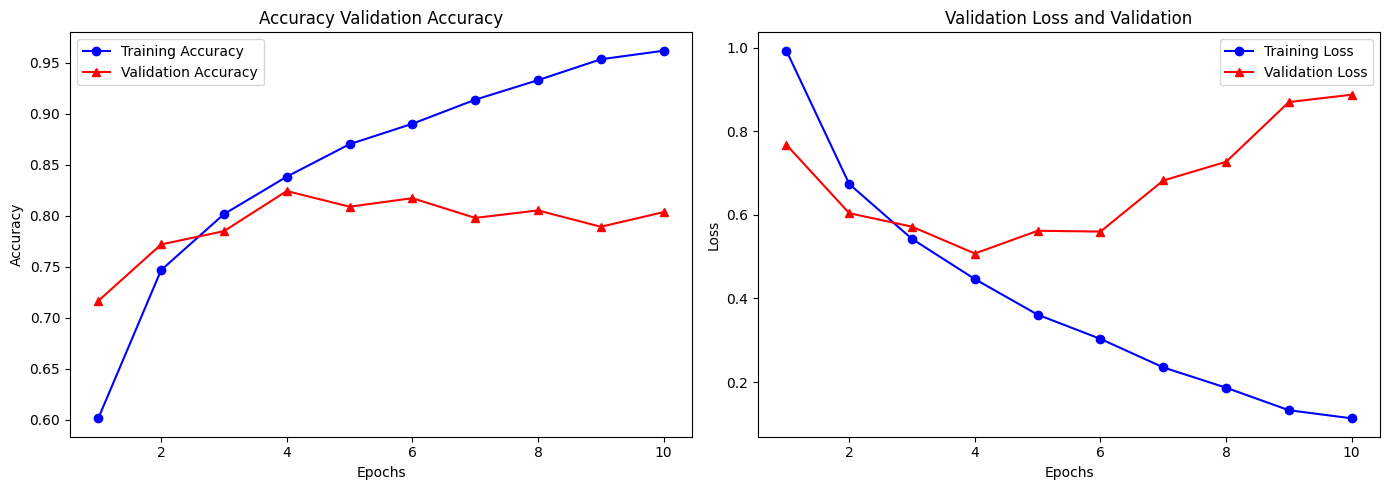

In [25]:
import matplotlib.pyplot as plt

#
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Obtener el número de épocas
epochs = range(1, len(acc) + 1)

# Trazar la gráfica de precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')  # 'bo-' : azul con puntos y líneas
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')  # 'r^-' : rojo con triángulos y líneas
plt.title('Accuracy Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Trazar la gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' : azul con puntos y líneas
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' : rojo con triángulos y líneas
plt.title('Validation Loss and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Analysis of the graphs**:

**1. Training and Validation Accuracy (Left Graph)**
 * **Training Accuracy (Blue Line):**

  * The training accuracy consistently increases with each epoch, reaching nearly 95% at the end of training. This indicates that the model is learning the training data well.

 * Validation Accuracy (Red Line):

  * The validation accuracy increases initially but starts to fluctuate and plateaus after a few epochs. It does not improve significantly beyond a certain point, indicating potential overfitting. The model is performing well on the training data but struggles to generalize to the validation data.

**2. Training and Validation Loss (Right Graph)**
 * Training Loss (Blue Line):

  * The training loss consistently decreases, which shows that the model is getting better at minimizing the error on the training data.


 * Validation Loss (Red Line):

  * The validation loss decreases initially but starts to fluctuate and even increases in later epochs. This is a classic sign of overfitting where the model fits the training data too closely and fails to perform well on new, unseen data (validation data).

## **Key Takeaways**

 1. **Overfitting**:

  * The model shows signs of overfitting. While the training accuracy keeps improving and the training loss decreases, the validation accuracy plateaus, and the validation loss starts to fluctuate and increase. This indicates that the model is memorizing the training data rather than learning to generalize.

 2. **Need for Regularization:**

  * To mitigate overfitting, consider implementing regularization techniques such as dropout, L2 regularization, or obtaining more training data.

 3. **Early Stopping:**

  * Implementing early stopping could help stop the training process when the validation loss stops decreasing, preventing the model from overfitting.

 4. **More Training Data**:

  * Acquiring more training data could help improve the model's ability to generalize.

 5. **Hyperparameter Tuning**:

  * Consider tuning hyperparameters such as learning rate, batch size, and model architecture to improve performance on the validation set.

In summary, while the model learns well on the training data, it does not generalize as effectively to the validation data, indicating overfitting. Adjustments in training strategy and regularization techniques are recommended to enhance the model's generalization capability.

In [26]:
from keras.models import load_model

# Chemin où vous voulez sauvegarder votre modèle
save_path = '/content/drive/Data/intel-image-classification.h5'

# Supposons que 'model' est votre modèle que vous avez entraîné
model.save(save_path)

print(f"Modèle sauvegardé à l'emplacement : {save_path}")

Modèle sauvegardé à l'emplacement : /content/drive/Data/intel-image-classification.h5


'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

Training Images:


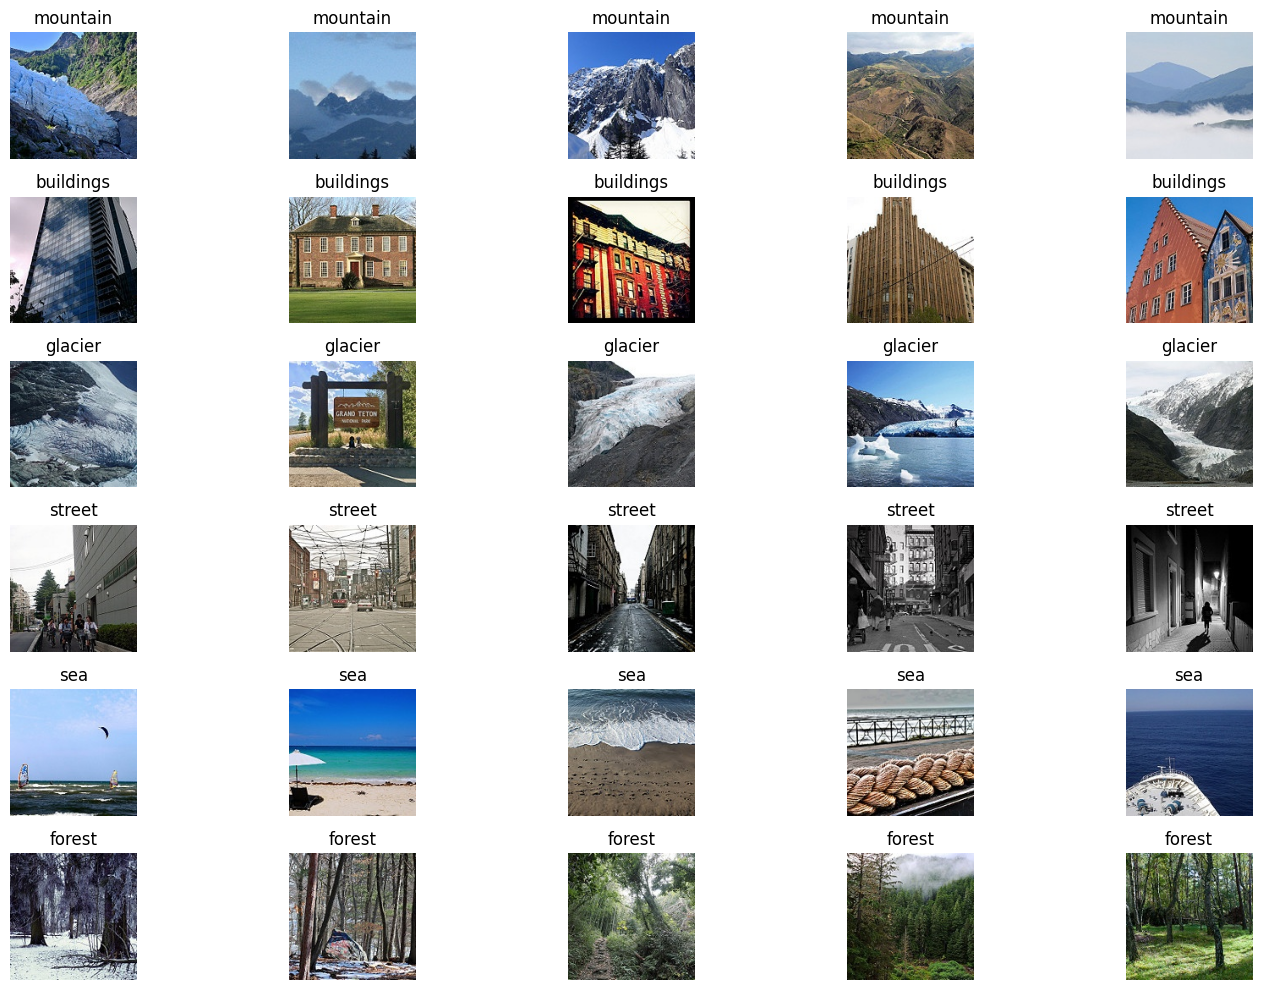

Validation Images:


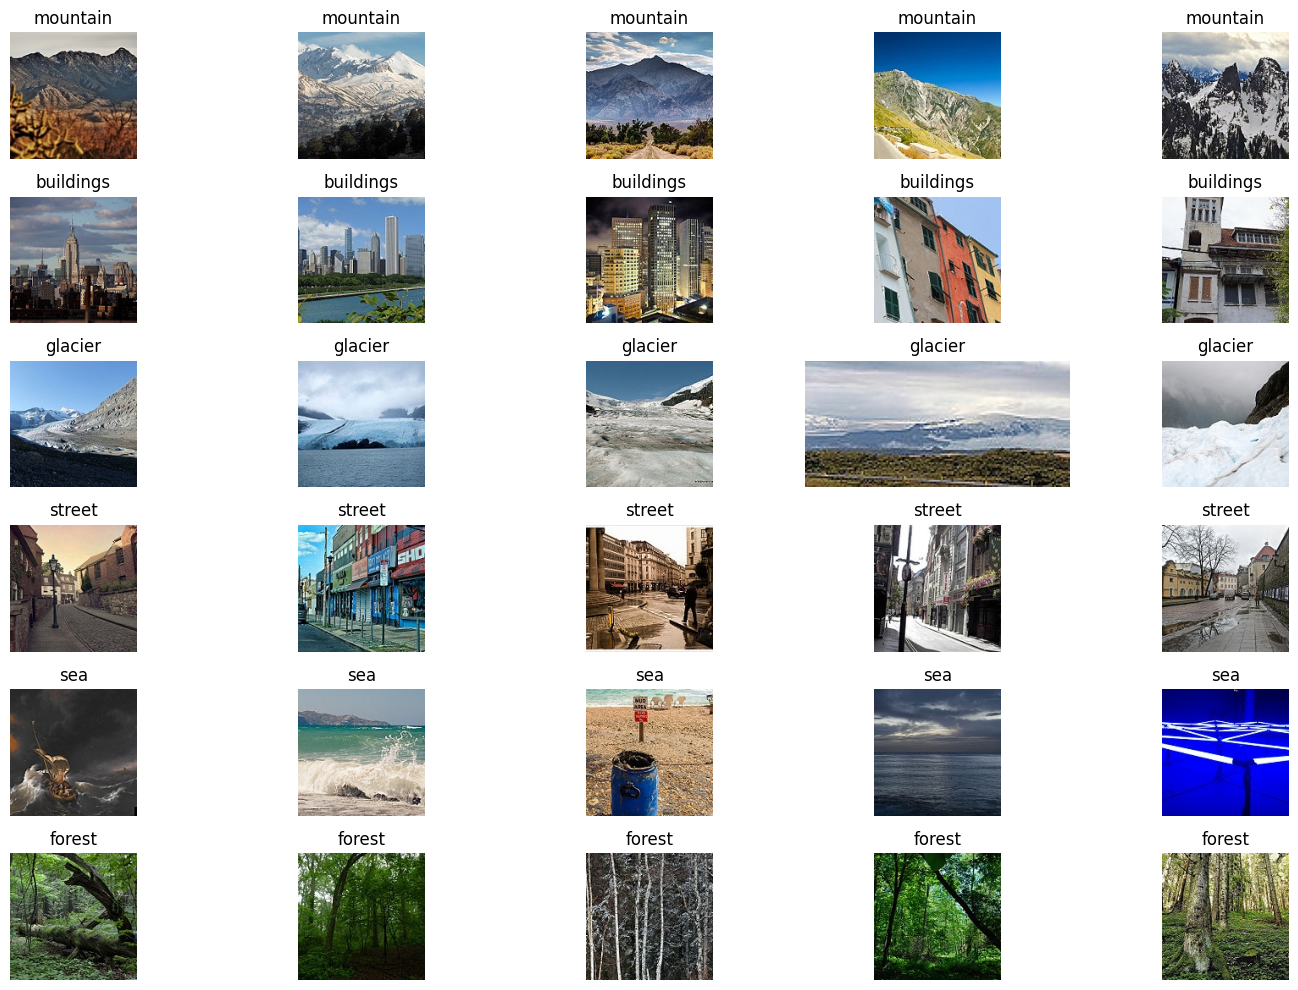

In [29]:

# Directorios de las imágenes de entrenamiento y validación

def show_random_images(directory, num_images=5):
    class_names = os.listdir(directory)

    plt.figure(figsize=(15, 10))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        images = os.listdir(class_path)

        for j in range(num_images):
            img_name = random.choice(images)
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)

            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar imágenes aleatorias del conjunto de entrenamiento
print("Training Images:")
show_random_images(train_dir)

# Mostrar imágenes aleatorias del conjunto de validación
print("Validation Images:")
show_random_images(validation_dir)
